# Check Momentum/Energy/Vorticity Diagnostics

In [1]:


###############################################
# Import necessary modules
###############################################

import os
import sys

# Add the path to custom modules
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/")

# Import custom modules
from Modules import *
from Modules_gula import *

###############################################
# Configuration settings
###############################################

# Directory where figures will be saved
SAVE_FIG_DIR = './Figures/'
VERTICAL_INTEGRATION = True


no amg module


In [2]:
#%%capture

####################
# Choose simulation
####################

# Define the simulation to load
mysimul = 'gulfstream_diagnostics_energy_250710'; uvint = True
#mysimul = 'gulfstream_diagnostics_energy_240228'; uvint = False


#######################################
# Time settings
#######################################

time_avg = 0
navg = 10

time_his = navg - 1
time_his_0 = 0
time_his_1 = navg

####################
# Load simulation data
####################

# Load the simulation
simul = simul_his = load(mysimul, time=time_his, output=False)

# Print the netCDF file associated with the simulation
print(simul.ncfile)


/net/libra/local/tmp/1//gula/ROMS/test_roms/test_diagnostics_2025/test_budget_gulfstream_diagnostics_energy_250710/OUT/croco_his.nc


## Various plotting and integration functions

In [3]:

# Define font sizes
fontsize0 = 6
fontsize1 = 10
fontsize2 = 14  # No need to use format() here as it's not a string conversion
fontsize3 = 18

# Set the default font size
font = {'size': fontsize1}
plt.rc('font', **font)


###################################################################################


def plot_common(simul, ax1, myvar, title, panel, levels):
    """
    Common plotting function to create a pcolormesh plot with contours.

    Parameters:
    - simul: Simulation object containing x, y, and topo data.
    - ax1: Axes object to plot on.
    - myvar: Variable to plot.
    - title: Title of the plot.
    - panel: Panel label.
    - levels: Levels for the color map.
    """
    x, y = simul.x, simul.y

    mysum = np.nansum(myvar[1:-1, 1:-1])
    
    # Adjust myvar based on its shape
    if myvar.shape[0] == x.shape[0] - 1 and myvar.shape[1] == x.shape[1]:
        myvar = tools.u2rho(myvar)
    elif myvar.shape[0] == x.shape[0] and myvar.shape[1] == x.shape[1] - 1:
        myvar = tools.v2rho(myvar)
    elif myvar.shape[0] == x.shape[0] - 1 and myvar.shape[1] == x.shape[1] - 1:
        myvar = tools.psi2rho(myvar)

    # Create the pcolormesh plot
    my_cmap = plot.ncview_colormap('blue_red')
    joe = ax1.pcolormesh(x.T, y.T, np.ma.masked_invalid(myvar.T),
                          vmin=levels.min(), vmax=levels.max(),
                          cmap=my_cmap, rasterized=True)

    # Add contours
    ax1.contour(simul.x.T, simul.y.T, simul.topo.T, [1, 100, 500, 1000],
                colors='k', linewidths=0.1)

    # Add text annotations
    t1 = ax1.text(0.9, 0.21, "{0:.2f}".format(mysum),
                  fontsize=fontsize0, horizontalalignment='right',
                  verticalalignment='center', transform=ax1.transAxes)

    t1 = ax1.text(0.9, 0.11, title,
                  fontsize=fontsize1, horizontalalignment='right',
                  verticalalignment='center', transform=ax1.transAxes)

    # Add panel label
    if panel != ' ':
        color = 'w'
        box = 'circle,pad=0.15'
        props = dict(boxstyle=box, facecolor=color, edgecolor='k', lw=1, alpha=0.5)
        ax1.text(0.1, 0.9, panel,
                 fontsize=fontsize2, horizontalalignment='left',
                 verticalalignment='top', bbox=props, transform=ax1.transAxes)

    # Remove axis labels
    ax1.xaxis.set_major_formatter(NullFormatter())
    ax1.yaxis.set_major_formatter(NullFormatter())

    return joe

###################################################################################

def panels2(simul, var1, var2, filename, titles=[' ', ' ', ' ', ' '], coeflev=1.):
    """
    Create a figure with two panels.

    Parameters:
    - simul: Simulation object.
    - var1, var2: Variables to plot.
    - filename: Name of the file to save the figure.
    - titles: List of titles for each panel.
    - coeflev: Coefficient for levels.
    """
    fig = plt.figure(figsize=(8.0, 3.0))
    levels = np.arange(-1, 1.01, 0.01)

    ax1 = fig.add_subplot(121, facecolor='Gainsboro')
    joe = plot_common(simul, ax1, var1 / coeflev, titles[0], 'a', levels)

    ax1 = fig.add_subplot(122, facecolor='Gainsboro')
    plot_common(simul, ax1, var2 / coeflev, titles[1], 'b', levels)

    plt.subplots_adjust(right=0.9, wspace=0.01, hspace=0.01)
    cbar_ax = fig.add_axes([0.94, 0.32, 0.02, 0.30])
    fig.colorbar(joe, cax=cbar_ax, ticks=oldsim.clabels(levels))

    if VERTICAL_INTEGRATION:
        filename += '_vertint'
    plt.savefig(SAVE_FIG_DIR + filename + '.png', dpi=200, bbox_inches='tight')


###################################################################################


def panels4(simul, var1, var2, var3, var4, filename, titles=[' ', ' ', ' ', ' '], coeflev=1.):
    """
    Create a figure with four panels.

    Parameters:
    - simul: Simulation object.
    - var1, var2, var3, var4: Variables to plot.
    - filename: Name of the file to save the figure.
    - titles: List of titles for each panel.
    - coeflev: Coefficient for levels.
    """
    fig = plt.figure(figsize=(8.0, 6.0))
    levels = np.arange(-1, 1.01, 0.01)

    ax1 = fig.add_subplot(221, facecolor='Gainsboro')
    joe = plot_common(simul, ax1, var1 / coeflev, titles[0], 'a', levels)

    ax1 = fig.add_subplot(222, facecolor='Gainsboro')
    plot_common(simul, ax1, var2 / coeflev, titles[1], 'b', levels)

    ax1 = fig.add_subplot(223, facecolor='Gainsboro')
    plot_common(simul, ax1, var3 / coeflev, titles[2], 'c', levels)

    ax1 = fig.add_subplot(224, facecolor='Gainsboro')
    plot_common(simul, ax1, var4 / coeflev, titles[3], 'd', levels)

    plt.subplots_adjust(right=0.9, wspace=0.01, hspace=0.01)
    cbar_ax = fig.add_axes([0.94, 0.32, 0.02, 0.30])
    fig.colorbar(joe, cax=cbar_ax, ticks=oldsim.clabels(levels))

    if VERTICAL_INTEGRATION:
        filename += '_vertint'
    plt.savefig(SAVE_FIG_DIR + filename + '.png', dpi=200, bbox_inches='tight')


###################################################################################

def panels8(simul, var1, var2, var3, var4, var5, var6, var7, var8, var9, filename, titles=[' ']*10, coeflev=1.):
    """
    Create a figure with eight panels.

    Parameters:
    - simul: Simulation object.
    - var1 to var9: Variables to plot.
    - filename: Name of the file to save the figure.
    - titles: List of titles for each panel.
    - coeflev: Coefficient for levels.
    """
    fig = plt.figure(figsize=(8.0, 6.0))
    levels = np.arange(-1, 1.01, 0.01)

    ax1 = fig.add_subplot(331, facecolor='Gainsboro')
    joe = plot_common(simul, ax1, var1 / coeflev, titles[0], 'a', levels)

    ax1 = fig.add_subplot(332, facecolor='Gainsboro')
    plot_common(simul, ax1, var2 / coeflev, titles[1], 'b', levels)

    ax1 = fig.add_subplot(333, facecolor='Gainsboro')
    plot_common(simul, ax1, var3 / coeflev, titles[2], 'c', levels)

    ax1 = fig.add_subplot(334, facecolor='Gainsboro')
    plot_common(simul, ax1, var4 / coeflev, titles[3], 'd', levels)

    ax1 = fig.add_subplot(335, facecolor='Gainsboro')
    plot_common(simul, ax1, var5 / coeflev, titles[4], 'e', levels)

    ax1 = fig.add_subplot(336, facecolor='Gainsboro')
    plot_common(simul, ax1, var6 / coeflev, titles[5], 'f', levels)

    ax1 = fig.add_subplot(337, facecolor='Gainsboro')
    plot_common(simul, ax1, var7 / coeflev, titles[6], 'g', levels)

    ax1 = fig.add_subplot(338, facecolor='Gainsboro')
    plot_common(simul, ax1, var8 / coeflev, titles[7], 'h', levels)

    ax1 = fig.add_subplot(339, facecolor='Gainsboro')
    plot_common(simul, ax1, var9 / coeflev, titles[8], 'i', levels)

    plt.subplots_adjust(right=0.9, wspace=0.01, hspace=0.01)
    cbar_ax = fig.add_axes([0.94, 0.32, 0.02, 0.30])
    fig.colorbar(joe, cax=cbar_ax, ticks=oldsim.clabels(levels))

    if VERTICAL_INTEGRATION:
        filename += '_vertint'
    plt.savefig(SAVE_FIG_DIR + filename + '.png', dpi=200, bbox_inches='tight')


###################################################################################

def vert(myvar, Hz=None, iz=-1, VERTICAL_INTEGRATION=True):
    """
    Perform vertical integration or select a specific depth level.

    Parameters:
    - myvar: Variable to process.
    - Hz: Depth levels.
    - iz: Depth index.
    - VERTICAL_INTEGRATION: Flag to perform vertical integration.

    Returns:
    - Processed variable.
    """
    if VERTICAL_INTEGRATION:
        if Hz is None:
            out = np.nansum(myvar, axis=2)
        else:
            if myvar.shape[0] == Hz.shape[0] - 1 and myvar.shape[1] == Hz.shape[1]:
                Hz = tools.rho2u(Hz)
            elif myvar.shape[0] == Hz.shape[0] and myvar.shape[1] == Hz.shape[1] - 1:
                Hz = tools.rho2v(Hz)
            elif myvar.shape[0] == Hz.shape[0] - 1 and myvar.shape[1] == Hz.shape[1] - 1:
                Hz = tools.rho2psi(Hz)
            out = np.nansum(Hz * myvar, axis=2)
    else:
        out = myvar[:, :, iz]
    return out

###################################################################################

def M2d(simul, simul1, x, y, uvint=False):
    """
    Calculate 2D momentum.

    Parameters:
    - simul, simul1: Simulation objects.
    - x, y: Coordinates.

    Returns:
    - 2D momentum.
    """
    if not uvint:
        z_r, z_w = tools.get_depths(simul1)
        Hz1 = z_w[:, :, 1:] - z_w[:, :, :-1]
        del z_r, z_w

    u0 = var('u', simul).data
    v0 = var('v', simul).data
    u1 = var('u', simul1).data
    v1 = var('v', simul1).data

    u = (u0 + u1) / 2
    v = (v0 + v1) / 2

    kex = (( u * x).T /
                 (0.5 * (simul.pm[1:, :] + simul.pm[:-1, :]) *
                  0.5 * (simul.pn[1:, :] + simul.pn[:-1, :])).T).T

    key = (( v * y).T /
                 (0.5 * (simul.pm[:, 1:] + simul.pm[:, :-1]) *
                  0.5 * (simul.pn[:, 1:] + simul.pn[:, :-1])).T).T

    
    if not uvint:
        kex *= 0.5 * (Hz1[1:, :, :] + Hz1[:-1, :, :])
        key *= 0.5 * (Hz1[:, 1:, :] + Hz1[:, :-1, :])
        
    ke = np.zeros((simul.mask.shape[0], simul.mask.shape[1], kex.shape[2]))
    ke[1:-1, :, :] = 0.5 * (kex[1:, :, :] + kex[:-1, :, :])
    ke[:, 1:-1, :] += 0.5 * (key[:, 1:, :] + key[:, :-1, :])

    ke2d = np.nansum(ke, axis=2)
    return ke2d  

###################################################################################

def Mstr(simul, x, y, depths=[0]):
    # Extract u and v velocity components at specified depths
    u = var('u', simul, depths=depths).data
    v = var('v', simul, depths=depths).data

    # Calculate momentum flux term for u component
    kex = u * x / (
        0.5 * (simul.pm[1:, :] + simul.pm[:-1, :]) *
        0.5 * (simul.pn[1:, :] + simul.pn[:-1, :])
    ) / simul.rho0

    # Calculate momentum flux term for v component
    key = v * y / (
        0.5 * (simul.pm[:, 1:] + simul.pm[:, :-1]) *
        0.5 * (simul.pn[:, 1:] + simul.pn[:, :-1])
    ) / simul.rho0

    # Initialize an array for the spatially averaged momentum flux
    ke = np.zeros((simul.mask.shape[0], simul.mask.shape[1]))

    # Average kex in the x-direction
    ke[1:-1, :] = 0.5 * (kex[1:, :] + kex[:-1, :])

    # Average key in the y-direction and add to ke
    ke[:, 1:-1] += 0.5 * (key[:, 1:] + key[:, :-1])

    return ke




## Momentum Budget

- Check that the pointwise momentum budget is closed (based on terms defined in the NetCDF file):

```
u_rate = u_xadv + u_yadv + u_vadv + u_prsgrd + u_cor + u_vmix + u_hmix + u_nudg (+ u_fast)
v_rate = v_xadv + v_yadv + v_vadv + v_prsgrd + v_cor + v_vmix + v_hmix + v_nudg (+ v_fast)
```

- Others terms included in the output file are `u_hdiff` and `u_baro`. These are already included in other terms and are not needed to close the budget. 

- The term `hdiff` is already included in `xadv` and `yadv`.  
  In the plot below, we separate the model advective terms into pure advection and diffusion by doing:

```
u_adv = u_xadv + u_yadv + u_vadv - u_hdiff

```

- The optional term `baro` is included in `vmix` by default, but physically makes more sense in `prsgrd`:

```
u_vmix   = u_vmix - u_baro
u_prsgrd = u_prsgrd + u_baro
```

- The optional term `fast` (corresponding to bottom drag) is added to `vmix` below:

```
u_vmix = u_vmix + u_fast
```

- The plotted Momentum Budget is thus:

```
u_rate = u_adv + u_prsgrd + u_cor + u_hmix + u_hdiff + u_vmix + u_nudg
```

where the terms are vertically integrated if VERTICAL_INTEGRATION is True, or computed at the surface otherwise.

**The important is that the difference```u_rate - u_tot``` (where ```u_tot``` is the sum of all the r.h.s. terms) remains very small. See the bottom right panel in the following figures.**


simul_uv.date Jan 01 - 00:00
simul_his.date Jan 01 - 00:00
 
component  u
######################################
uvrate is  33.24506976826593
uvtot - uvrate is  2.862146840385343e-08
error is 8.609236979605933e-10
######################################

component  v
######################################
uvrate is  -63.46287455413333
uvtot - uvrate is  4.097306850014973e-08
error is 6.456226382434037e-10
######################################



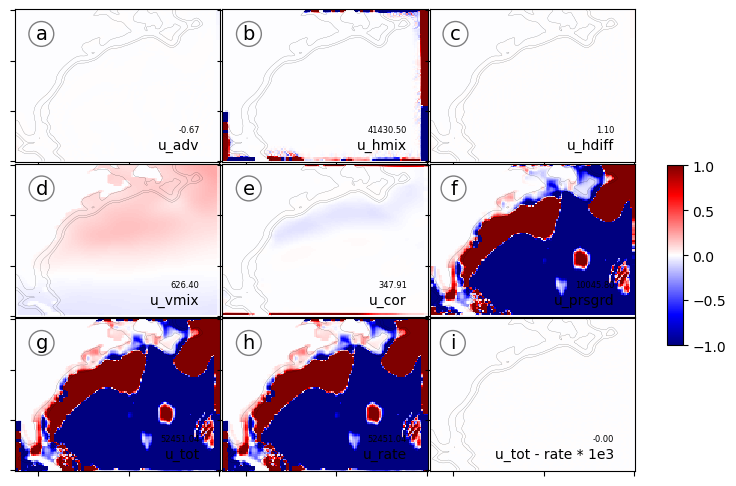

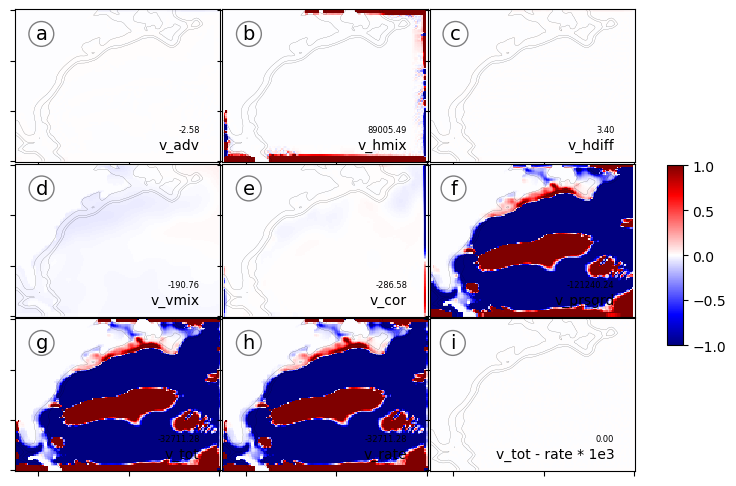

In [4]:

# Load simulation data
simul_uv = load(mysimul +'_uv', time = time_his, output = False)
simul_his = load(mysimul + '_his', time = time_his_1, output = False)

#######################################

# Calculate depth levels
if not uvint:
    [z_r, z_w] = tools.get_depths(simul_his)
    Hz = z_w[:,:,1:] - z_w[:,:,:-1]
    del z_r,z_w
else:
    Hz = None
    
#######################################

# Print simulation dates for verification
print('simul_uv.date', simul_uv.date)
print('simul_his.date', simul_his.date)
print(' ')

#######################################

# Loop over velocity components
for component in ['u','v']:
    ###########################################################################

    print('component ', component)

    # Determine the appropriate mask based on the component
    if component == 'u':
        mask = tools.rho2u(simul_uv.mask)
    else:
        mask = tools.rho2v(simul_uv.mask)

    # Calculate various terms of the momentum equation
    uv_rate  = vert(var(component+'_rate',simul_uv).data[:,:,:],Hz) * mask
    uv_hdiff = vert(var(component+'_hdiff',simul_uv).data[:,:,:],Hz) * mask
    uv_adv   = vert(var(component+'_xadv',simul_uv).data[:,:,:]\
                  + var(component+'_yadv',simul_uv).data[:,:,:]\
                  + var(component+'_vadv',simul_uv).data[:,:,:],Hz)* mask\
                  - uv_hdiff
    uv_hmix  = vert(var(component+'_hmix',simul_uv).data[:,:,:],Hz) * mask
    uv_vmix  = vert(var(component+'_vmix',simul_uv).data[:,:,:],Hz) * mask
    uv_forc  = vert(var(component+'_nudg',simul_uv).data[:,:,:],Hz) * mask
    uv_prsgrd = vert(var(component+'_prsgrd',simul_uv).data[:,:,:],Hz) * mask
    uv_cor = vert(var(component+'_cor',simul_uv).data[:,:,:],Hz) * mask

    # Handle optional terms if they exist
    try:
        uv_fast = vert(var(component+'_fast',simul_uv).data[:,:,:],Hz) * mask
        uv_vmix += uv_fast
        fast = True
    except:
        fast = False

    try:
        uv_baro = vert(var(component+'_baro',simul_uv).data[:,:,:],Hz) * mask
        uv_vmix -= uv_baro
        uv_prsgrd += uv_baro
        baro = True
    except:
        baro = False

    # Calculate total momentum change
    uv_tot = uv_adv + uv_prsgrd  + uv_cor + uv_hmix + uv_hdiff + uv_vmix + uv_forc 
    
    # Print error analysis
    print('######################################')
    print('uvrate is ', np.nansum(uv_rate))
    print('uvtot - uvrate is ', np.nansum(uv_tot - uv_rate))
    print('error is', np.abs(np.nansum(uv_tot - uv_rate)/np.nansum(uv_rate)))
    print('######################################\n')

    
    # Create titles for the plots
    titles = [component+'_adv', component+'_hmix', component+'_hdiff', component+'_vmix',\
                     component+'_cor', component+'_prsgrd', component+'_tot', component+'_rate',  component+'_tot - rate * 1e3']
    
    # Visualize the components
    panels8(simul_uv,uv_adv,\
                     uv_hmix,\
                     uv_hdiff,\
                     uv_vmix,\
                     uv_cor,\
                     uv_prsgrd,\
                     uv_tot,\
                     uv_rate,\
                     (uv_tot - uv_rate)* 1e3,'diags_' +component+'_' + simul_uv.simul, titles= titles, coeflev=1e-3)




## Momentum Budget

- Check that the pointwise momentum budget terms ($M_{i,j}^{n+\frac{1}{2}}$) capture the time evolution of the momentum between consecutive time steps $n$ and $n+1$.

$$\frac{H^{n+1} u_i^{n+1} - H^{n} u_i^n}{\Delta t} =  \sum_j \, M_{i,j}^{n+\frac{1}{2}}$$

The l.h.s is computed by using two consecutive history files, the r.h.s. by using momentum budget terms averaged over the same period.

**The important is to check that the difference ```u_rate - dudt``` remains very small. See the bottom panels in the following figures.**

In order to verify this equation over longer periods, we need to vertically integrate output momentum terms (not currently done).


 
check that the following scrum times are the same: 
history:  5
momentum budget:  3
average:  3


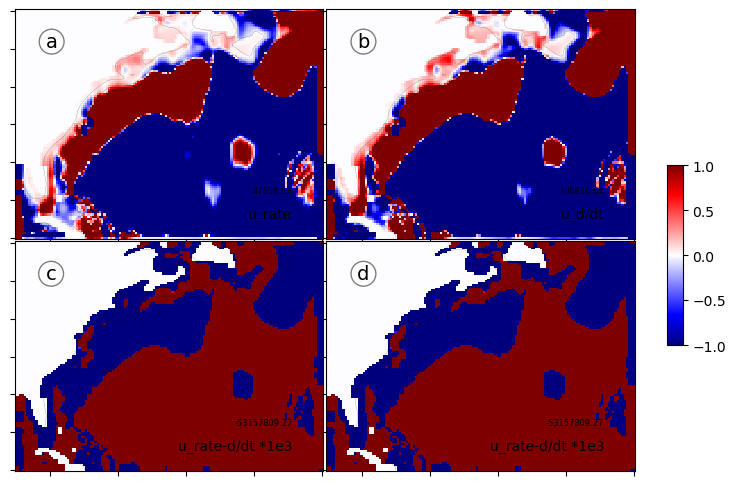

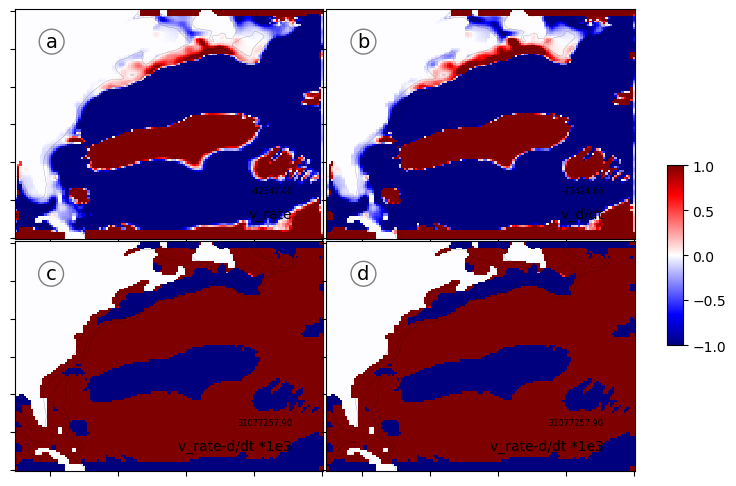

In [5]:


###########################################################################

simul_uv = load(mysimul + '_uv_avg', time = time_avg, output = False)
simul_avg = load(mysimul + '_avg', time = time_avg, output = False)
simul_his_0 = load(mysimul + '_his', time = time_his_0, output = False)
simul_his_1 = load(mysimul + '_his', time = time_his_1, output = False)

###########################################################################

print(' ')
print('check that the following scrum times are the same:', end=' \n') 
print('history: ',(simul_his_0.oceantime + simul_his_1.oceantime + int(simul_his_0.dt_model))//2)
print('momentum budget: ',simul_uv.oceantime )
print('average: ',simul_avg.oceantime )


for component in ['u','v']:

    ###########################################################################

    if component=='u': mask = tools.rho2u(simul_uv.mask)
    else: mask = tools.rho2v(simul_uv.mask)


    if not uvint:
        [z_r, z_w] = tools.get_depths(simul_avg)
        Hz_avg = z_w[:,:,1:] - z_w[:,:,:-1]; del z_r, z_w
    else:
        Hz_avg = None
    uv_rate = vert(var(component+'_rate',simul_uv).data[:,:,:],Hz_avg) * mask

    #############

    [z_r, z_w] = tools.get_depths(simul_his_1)
    Hz_1 = z_w[:,:,1:] - z_w[:,:,:-1]; del z_r, z_w
    [z_r, z_w] = tools.get_depths(simul_his_0)
    Hz_0 = z_w[:,:,1:] - z_w[:,:,:-1]; del z_r, z_w
    dudt = (vert(var(component,simul_his_1).data,Hz_1) -vert( var(component,simul_his_0).data,Hz_0) )*mask /simul_uv.dt
    #dudt = (vert(var(component,simul_his_1).data,Hz_avg) -vert( var(component,simul_his_0).data,Hz_avg) )*mask /simul_uv.dt

    #############

    #coeflev = 1e-3*mycoef
    titles = [component+'_rate', component+'_d/dt', component+'_rate-d/dt *1e3', component+'_rate-d/dt *1e3']
    panels4(simul_uv,uv_rate ,\
                     dudt,\
                     (uv_rate - dudt)*1e3,\
                     (uv_rate - dudt)*1e3,'diags_d' +component+'dt_' + simul_uv.simul, titles= titles, coeflev=1e-3)



In [12]:
# compute vertical advective term (omega *du/dz) in a naive way:

def vadv(simul, field='u'):
    
    u = var('u',simul_his).data
    omega = var('omega',simul_his).data
    z_r, z_w = tools.get_depths(simul_his)
    vadv_w = - tools.rho2u(omega[:,:,1:-1]) * (u[:,:,1:]-u[:,:,:-1])/tools.rho2u(z_r[:,:,1:]-z_r[:,:,:-1])
    vadv = tools.rho2w(vadv_w)
                                 
    return vadv
    
# compute vertical advective term (w *du/dz) in a naive way:

def vadvz(simul, field='u'):
    
    u = var('u',simul_his).data
    w = var('w',simul_his).data
    z_r, z_w = tools.get_depths(simul_his)
    vadv = - tools.rho2u(w) * tools.diffz_sig(u,tools.rho2u(z_r),tools.rho2u(z_w))
    
    return vadv                            


## Check vertical advection term

simul_uv.date Jan 01 - 00:00
simul_his.date Jan 01 - 00:00
 
component  u
('[M,L,N]', [135, 114, 31])


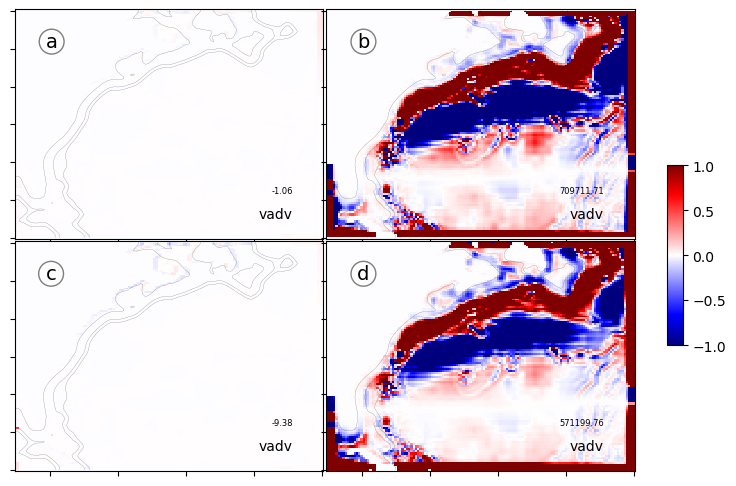

In [20]:

# Load simulation data
simul_uv = load(mysimul +'_uv', time = time_his, output = False)
simul_his = load(mysimul + '_his', time = time_his_1, output = False)

iz = -2
#######################################

# Print simulation dates for verification
print('simul_uv.date', simul_uv.date)
print('simul_his.date', simul_his.date)
print(' ')

#######################################

# Loop over velocity components
for component in ['u']: #,'v']:
    ###########################################################################

    print('component ', component)

    # Determine the appropriate mask based on the component
    if component == 'u':
        mask = tools.rho2u(simul_uv.mask)
    else:
        mask = tools.rho2v(simul_uv.mask)

    # Calculate various terms of the momentum equation
    uv_vadv   = vert(var(component+'_vadv',simul_uv).data[:,:,:],Hz, VERTICAL_INTEGRATION=False, iz=iz)* mask
    
    uv_vadvz   = vert(var(component+'_vadvz',simul_uv).data[:,:,:],Hz, VERTICAL_INTEGRATION=False, iz=iz)* mask

    uv_vadv2 = vadv(simul,'u')[:,:,iz]
    
    uv_vadvz2 = vadvz(simul,'u')[:,:,iz]
    
    
    titles = ['vadv','vadv','vadv','vadv']
    panels4(simul_uv,uv_vadv ,\
                     uv_vadvz,\
                     uv_vadv2,\
                     uv_vadvz2,'vadv_' +component+'dt_' + simul_uv.simul, titles= titles, coeflev=1e-9)



In [36]:
plt.p

NameError: name 'omega' is not defined

## KE budget



- Check that the pointwise kinetic energy budget is closed (based on terms defined in the NetCDF file):

```
ke_rate = ke_hadv + ke_vadv + ke_prsgrd + ke_vmix + ke_hmix + ke_nudg  + ke_cor + ke_vol (+ke_fast)
```

- Others terms included in the output file are `ke_hdiff` and `ke_baro`. These are already included in other terms and are not needed to close the budget. 

- The term `ke_hdiff` is already included in `ke_hadv`
  In the plot below, we separate the model advective terms into pure advection and diffusion by doing:

```
ke_adv = ke_hadv + ke_vadv - ke_hdiff

```

- The optional term `ke_baro` is included in `ke_vmix` by default, but physically makes more sense in `ke_prsgrd`:

```
ke_vmix    = ke_vmix - ke_baro
ke_prsgrd = ke_prsgrd + ke_baro
```

- The optional term `ke_fast` (corresponding to bottom drag) is added to `ke_vmix` below:

```
ke_vmix = ke_vmix + ke_fast
```

- The plotted Momentum Budget is thus:

```
ke_rate = ke_adv + ke_prsgrd + ke_vmix + ke_hmix + ke_hdiff  + ke_nudg  + ke_cor + ke_vol
```

where the terms are vertically integrated.

**The important is that the difference```ke_rate - ke_tot``` (where ```ke_tot``` is the sum of all the r.h.s. terms) remains very small. See the bottom right panel in the following figures.**


In [ ]:

###########################################################################

simul_ek = load(mysimul +'_ek', time = time_his, output = False)

#######################################

print('simul_ek.date', simul_ek.date)
print('simul_his.date', simul_his.date)

#######################################

def get_ke(varname,simul_ek):
    
    ke = var(varname,simul_ek).data
    
    if len(ke.shape)==2:
        return ke*simul_ek.mask
    else:   
        return np.nansum(ke,axis=2)*simul_ek.mask

#######################################

ke_rate = get_ke('ke_rate',simul_ek)
ke_hdiff = get_ke('ke_hdiff',simul_ek)

try:
    ke_adv =  get_ke('ke_hadv',simul_ek)\
         + get_ke('ke_vadv',simul_ek)\
         - ke_hdiff
except:
    ke_adv =  get_ke('ke_adv',simul_ek) - ke_hdiff

ke_cor =  get_ke('ke_cor',simul_ek)
ke_prsgrd =  get_ke('ke_prsgrd',simul_ek)
ke_hmix = get_ke('ke_hmix',simul_ek)
ke_vmix =  get_ke('ke_vmix',simul_ek)
ke_nudg = get_ke('ke_nudg',simul_ek)
ke_vol = get_ke('ke_vol',simul_ek)

ke_wind =  get_ke('ke_wind',simul_ek)
ke_drag = get_ke('ke_drag',simul_ek)

try:
    ke_baro =  get_ke('ke_baro',simul_ek)
    ke_vmix -= ke_baro
    ke_prsgrd += ke_baro
    baro = True
except:
    baro = False
    
try:
    ke_fast = get_ke('ke_fast',simul_ek)
    ke_vmix += ke_fast
    ke_drag = ke_fast
    fast = True
except:
    fast = False


ke_tot = ke_vol + ke_adv +  ke_cor + ke_prsgrd\
       + ke_hdiff + ke_hmix + ke_vmix + ke_nudg 

print('######################################')
print(('ekrate is ', np.nansum(ke_rate)))
print(('ektot - ekrate is ', np.nansum(ke_tot - ke_rate)))
print(('error is', np.abs(np.nansum(ke_tot - ke_rate)/np.nansum(ke_rate))))
print('######################################')

######################################

titles = ['ke_adv', 'ke_cor', 'ke_prsgrd', 'ke_hmix+ke_hdiff', 'ke_vmix',\
                 'ke_fast', 'ke_vol', 'ke_tot', '(ke_tot - ke_rate)*1e3']

panels8(simul_ek,ke_adv,\
                 ke_cor,\
                 ke_prsgrd,\
                 ke_hmix + ke_hdiff,\
                 ke_vmix + ke_nudg,\
                 ke_fast,\
                 ke_vol*1e3,\
                 ke_tot,\
                 (ke_tot - ke_rate)*1e3,'diags_ke_' + simul_ek.simul,\
        titles= titles, coeflev=1e4)



## Kinetic Energy Budget

- Check that the pointwise KE budget terms ($KE_{i,j}^{n+\frac{1}{2}}$) capture the time evolution of the kinetic energy between consecutive time steps $n$ and $n+1$.

$$\frac{\frac{1}{2} H^{n+1} (u_i^{n+1})^2 - \frac{1}{2} H^{n} (u_i^n)^2}{\Delta t} = \sum_j \, KE_{i,j}^{n+\frac{1}{2}}$$

The l.h.s is computed by using two consecutive history files, the r.h.s. by using KE budget terms averaged over the same period.

**The important is to check that the difference ```ke_rate - dkedt``` remains very small. See the bottom panels in the following figure.**



In [ ]:

simul_ek = load(mysimul +'_ek_avg', time = time_avg, output = False)

simul_his_0 = load(mysimul + '_his', time = time_his_0, output = False)
simul_his_1 = load(mysimul + '_his', time = time_his_1, output = False)

print(simul_ek.ncfile)

#######################################

print(' ')
print('check that the following scrum times are the same:', end=' \n') 
print('history: ',(simul_his_0.oceantime + simul_his_1.oceantime + int(simul_his_0.dt_model))/2)
print('ke budget: ',simul_ek.oceantime )

#############

def ke2d(simul):
    
    mask = copy(simul.mask)
    mask[np.isnan(mask)] = 0.
    umask = mask[1:,:]*mask[:-1,:]
    vmask = mask[:,1:]*mask[:,:-1]
    
    [z_r, z_w] = tools.get_depths(simul)
    Hz = z_w[:,:,1:] - z_w[:,:,:-1]
    del z_r,z_w
    
    u = var('u',simul).data
    v = var('v',simul).data
    
    kex =   0.25 * (((Hz[1:,:,:,] + Hz[:-1,:,:,])  * u**2).T\
        / (   0.5 *( simul.pm[1:,:] + simul.pm[:-1,:])\
            * 0.5 *( simul.pn[1:,:] + simul.pn[:-1,:]) ).T\
    * umask.T ).T
    
    key =  (( 0.25 * (Hz[:,1:,:,] + Hz[:,:-1,:,])  * v**2).T\
        / (   0.5 *( simul.pm[:,1:] + simul.pm[:,:-1])\
            * 0.5 *( simul.pn[:,1:] + simul.pn[:,:-1]) ).T\
    * vmask.T ).T
    
    ke = np.zeros((simul.mask.shape[0],simul.mask.shape[1],kex.shape[2])) 
    ke[1:-1,1:-1,:] = 0.5 * (kex[1:,1:-1,:] + kex[:-1,1:-1,:])
    ke[1:-1,1:-1,:] +=  0.5 * (key[1:-1,1:,:] + key[1:-1,:-1,:]) 
    ke2d = np.nansum(ke,axis=2)
    return ke2d    

#############

ke_rate = get_ke('ke_rate',simul_ek)

dkedt = ( ke2d(simul_his_1) -  ke2d(simul_his_0) ) / simul_ek.dt

titles = ['ke_rate', 'dke/dt', 'ke_rate-dke/dt *1e3', 'ke_rate-dke/dt *1e3']

panels4(simul_ek,ke_rate ,\
                 dkedt,\
                 (ke_rate - dkedt)*1e3,\
                 (ke_rate - dkedt)*1e3,'diags_dkedt_' + simul_ek.simul, titles= titles, coeflev=1e6)



## Kinetic Energy Budget

Ensure that the KE and momentum budget terms are consistent.

First, compute the KE terms using the momentum terms and verify that the budget is closed. Then, compare them to the terms from the KE budget.


- The momentum budget is:

$$\frac{H^{n+1} u_i^{n+1} - H^{n} u_i^n}{\Delta t} =  \sum_j \, M_{i,j}^{n+\frac{1}{2}}$$

- The KE budget is:
    
$$\frac{\frac{1}{2} H^{n+1} (u_i^{n+1})^2 - \frac{1}{2} H^{n} (u_i^n)^2}{\Delta t} = \sum_j \, KE_{i,j}^{n+\frac{1}{2}}$$

where the KE terms are computed from the respective momentum terms as:

$$KE_{i,j}^{n+\frac{1}{2}} = \frac{u^{n+1}+{u^n}}{2} M_{i,j}^{n+\frac{1}{2}}$$

with the addition of an extra volume correction term (```ke_vol```), such that:

$$\frac{\frac{1}{2} H^{n+1} (u_i^{n+1})^2 - \frac{1}{2} H^{n} (u_i^n)^2}{\Delta t} = \frac{u^{n+1}+{u^n}}{2} \sum_j \, M_{i,j}^{n+\frac{1}{2}} \underbrace{- \frac{u^{n+1} {u^n}}{2}(H^{n+1} - H^{n})}_{ke_{vol}} $$

This works only with history files.



In [ ]:


###########################################################################
# Load diags and consecutive history files 
###########################################################################

simul_ek = load(mysimul +'_ek', time = time_his, output = False)
simul_uv = load(mysimul + '_uv', time = time_his, output = False)

simul_his_0 = load(mysimul + '_his', time = time_his, output = False)
simul_his_1 = load(mysimul + '_his', time = time_his+1, output = False)

print(simul_ek.ncfile)
print(simul_uv.ncfile)

print(simul_ek.oceantime)
print(simul_uv.oceantime)

################
# u-component
################

component='u'

mask = tools.rho2u(simul_uv.mask)

u_rate  = var(component+'_rate',simul_uv).data[:,:,:]
u_hdiff = var(component+'_hdiff',simul_uv).data[:,:,:]
u_adv   = var(component+'_xadv',simul_uv).data[:,:,:]\
              + var(component+'_yadv',simul_uv).data[:,:,:]\
              + var(component+'_vadv',simul_uv).data[:,:,:]\
              - u_hdiff
u_hmix  = var(component+'_hmix',simul_uv).data[:,:,:]
u_vmix  = var(component+'_vmix',simul_uv).data[:,:,:]
u_nudg  = var(component+'_nudg',simul_uv).data[:,:,:]
u_prsgrd = var(component+'_prsgrd',simul_uv).data[:,:,:]
u_cor = var(component+'_cor',simul_uv).data[:,:,:]

try:
    u_fast = var(component+'_fast',simul_uv).data[:,:,:]
    u_vmix += u_fast
except:
    pass

try:
    u_baro = var(component+'_baro',simul_uv).data[:,:,:]
    u_vmix -= u_baro
    u_prsgrd += u_baro
except:
    pass

u_tot = u_adv + u_prsgrd  + u_cor + u_hmix + u_hdiff + u_vmix + u_nudg 

u_wind = var('sustr',simul_his).data
u_drag = var('bustr',simul_his).data

################
# v-component
################

component='v'

mask = tools.rho2v(simul_uv.mask)

v_rate  = var(component+'_rate',simul_uv).data[:,:,:]
v_hdiff = var(component+'_hdiff',simul_uv).data[:,:,:]
v_adv   = var(component+'_xadv',simul_uv).data[:,:,:]\
              + var(component+'_yadv',simul_uv).data[:,:,:]\
              + var(component+'_vadv',simul_uv).data[:,:,:]\
              - v_hdiff
v_hmix  = var(component+'_hmix',simul_uv).data[:,:,:]
v_vmix  = var(component+'_vmix',simul_uv).data[:,:,:]
v_nudg  = var(component+'_nudg',simul_uv).data[:,:,:]
v_prsgrd = var(component+'_prsgrd',simul_uv).data[:,:,:]
v_cor = var(component+'_cor',simul_uv).data[:,:,:]

try:
    v_fast = var(component+'_fast',simul_uv).data[:,:,:]
    v_vmix += v_fast
except:
    pass

try:
    v_baro = var(component+'_baro',simul_uv).data[:,:,:]
    v_vmix -= v_baro
    v_prsgrd += v_baro
except:
    pass

v_tot = v_adv + v_prsgrd  + v_cor + v_hmix + v_hdiff + v_vmix + v_nudg 

v_wind = var('svstr',simul_his).data
v_drag = var('bvstr',simul_his).data

######################################

ke_rate_uv = M2d(simul_his_0,simul_his_1,u_rate,v_rate,uvint=uvint)*simul_ek.mask
ke_adv_uv =  M2d(simul_his_0,simul_his_1,u_adv,v_adv,uvint=uvint)*simul_ek.mask
ke_cor_uv =  M2d(simul_his_0,simul_his_1,u_cor,v_cor,uvint=uvint)*simul_ek.mask
ke_prsgrd_uv = M2d(simul_his_0,simul_his_1,u_prsgrd,v_prsgrd,uvint=uvint)*simul_ek.mask
ke_hmix_uv = M2d(simul_his_0,simul_his_1,u_hmix,v_hmix,uvint=uvint)*simul_ek.mask
ke_vmix_uv =  M2d(simul_his_0,simul_his_1,u_vmix,v_vmix,uvint=uvint)*simul_ek.mask
ke_nudg_uv = M2d(simul_his_0,simul_his_1,u_nudg,v_nudg,uvint=uvint)*simul_ek.mask
ke_hdiff_uv = M2d(simul_his_0,simul_his_1,u_hdiff,v_hdiff,uvint=uvint)*simul_ek.mask

try:
    ke_fast_uv = M2d(simul_his_0,simul_his_1,u_fast,v_fast,uvint=uvint)*simul_ek.mask
except:
    ke_fast_uv = ke_hdiff_uv * 0.

try:
    ke_baro_uv = M2d(simul_his_0,simul_his_1,u_baro,v_baro,uvint=uvint)*simul_ek.mask
except:
    ke_baro_uv = ke_hdiff_uv * 0.

    
ke_tot_uv = ke_adv_uv +  ke_cor_uv + ke_prsgrd_uv + ke_hmix_uv + ke_vmix_uv + ke_nudg_uv + ke_hdiff_uv


ke_wind_uv = Mstr(simul,u_wind,v_wind,depths=[0])
ke_drag_uv = Mstr(simul,-u_drag,-v_drag,depths=[1])

######################################

print('######################################')
print('ekrate is ', np.nansum(ke_rate_uv))
print('ektot - ekrate is ', np.nansum(ke_tot_uv - ke_rate_uv))
print('error is', np.abs(np.nansum(ke_tot_uv - ke_rate_uv)/np.nansum(ke_rate_uv)))
print('######################################')

titles = ['ke_adv', 'ke_cor', 'ke_prsgrd', 'ke_hmix+ke_hdiff', 'ke_vmix',\
                 'ke_fast', 'ke_baro', 'ke_tot', '(ke_tot-ke_rate) * 1e3']
panels8(simul_ek,ke_adv_uv,\
                 ke_cor_uv,\
                 ke_prsgrd_uv,\
                 ke_hmix_uv+ke_hdiff_uv,\
                 ke_vmix_uv+ke_nudg_uv,\
                 ke_fast_uv,\
                 ke_baro_uv,\
                 ke_tot_uv,\
                 (ke_tot_uv - ke_rate_uv) * 1e3,'diags_ekfromuv_' + simul_ek.simul,\
        titles= titles, coeflev=1e4)

#############

ke_rate = get_ke('ke_rate',simul_ek)
ke_vol = get_ke('ke_vol',simul_ek)

#############

titles = ['ke_rate', 'ke_tot - ke_tot_uv', 'ke_rate - ke_rate_uv- ke_vol']

panels2(simul_ek,ke_rate,\
                 (ke_rate - ke_rate_uv - ke_vol),'diags_ekfromuv_' + simul_ek.simul,\
        titles= titles, coeflev=1e6)

#############


## Barotropic vorticity budget


- Check that the barotropic vorticity budget is closed (based on terms defined in the NetCDF file):

```
vrt_rate = vrt_xadv + vrt_yadv + vrt_prsgrd + vrt_vmix + vrt_hmix + vrt_nudg  + vrt_cor  (+vrt_fast)
```

- Others terms included in the output file are `vrt_hdiff`, `vrt_baro`, `vrt_wind`, `vrt_drag`. There are already included in other terms and are not needed to close the budget. 

- The term `vrt_hdiff` is already included in `vrt_xadv+vrt_yadv`. In the plot below, we separate the model advective terms into pure advection and diffusion by doing:

```
vrt_adv = vrt_xadv + vrt_vadv - vrt_hdiff

```

- The optional term `vrt_baro` is included in `vrt_vmix` by default, but physically makes more sense in `vrt_prsgrd`:

```
vrt_vmix    = vrt_vmix - vrt_baro
vrt_prsgrd = vrt_prsgrd + vrt_baro
```

- The terms `wind` and `drag` are already included in `vmix`.

- The optional term `fast` (corresponding to bottom drag) is added to `vmix` in the plot:

```
vrt_vmix = vrt_vmix + vrt_fast
```

- The plotted Momentum Budget is thus:

```
vrt_rate = vrt_adv + vrt_prsgrd + vrt_vmix + vrt_hmix + vrt_hdiff  + vrt_nudg  + vrt_cor 
```

where the terms are vertically integrated.

**The important is that the difference```vrt_rate - vrt_tot``` (where ```vrt_tot``` is the sum of all the r.h.s. terms) remains very small. See the bottom right panel in the following figures.**


In [ ]:

###########################################################################

simul_vrt = load(mysimul +'_vrt_avg', time = time_avg, output = False)

#######################################

print('simul_vrt.date', simul_vrt.date)

#######################################

def get_vrt(varname,simul_vrt):
    
    vrt = var(varname,simul_vrt).data\
        * tools.rho2psi(simul_vrt.mask)

    return vrt

#######################################
vrt_rate   = get_vrt('vrt_rate',simul_vrt)
vrt_hdiff  = get_vrt('vrt_hdiff',simul_vrt)

vrt_adv    = get_vrt('vrt_xadv',simul_vrt)\
           + get_vrt('vrt_yadv',simul_vrt)\
           - vrt_hdiff

vrt_cor    = get_vrt('vrt_cor',simul_vrt)
vrt_prsgrd = get_vrt('vrt_prsgrd',simul_vrt)
vrt_hmix   = get_vrt('vrt_hmix',simul_vrt)
vrt_vmix   = get_vrt('vrt_vmix',simul_vrt)
vrt_nudg   = get_vrt('vrt_nudg',simul_vrt)

vrt_wind   = get_vrt('vrt_wind',simul_vrt)
vrt_drag   = get_vrt('vrt_drag',simul_vrt)

try:
    vrt_baro =  get_vrt('vrt_baro',simul_vrt)
    vrt_vmix -= vrt_baro
    vrt_prsgrd += vrt_baro
    baro = True
except:
    baro = False
    
try:
    vrt_fast = get_vrt('vrt_fast',simul_vrt)
    vrt_vmix += vrt_fast
    vrt_drag = vrt_fast
    fast = True
except:
    fast = False


vrt_tot = vrt_adv   + vrt_cor  + vrt_prsgrd\
        + vrt_hdiff + vrt_hmix + vrt_vmix + vrt_nudg 

print('######################################')
print(('ekrate is ', np.nansum(vrt_rate)))
print(('ektot - ekrate is ', np.nansum(vrt_tot - vrt_rate)))
print(('error is', np.abs(np.nansum(vrt_tot - vrt_rate)/np.nansum(vrt_rate))))
print('######################################')

######################################

titles = ['vrt_adv', 'vrt_cor', 'vrt_prsgrd', 'vrt_hmix+vrt_hdiff', 'vrt_vmix',\
                 'vrt_fast', 'vrt_baro', 'vrt_rate', '(vrt_tot - vrt_rate)*1e3']

panels8(simul_vrt,vrt_adv,\
                  vrt_cor,\
                  vrt_prsgrd,\
                  vrt_hmix + vrt_hdiff,\
                  vrt_vmix + vrt_nudg,\
                  vrt_fast,\
                  vrt_baro,\
                  vrt_rate,\
                 (vrt_tot - vrt_rate)*1e3,'diags_vrt_' + simul_vrt.simul,\
        titles= titles, coeflev=1e-7)



## Barotropic vorticity Budget

Ensure that the barotropic vorticity and momentum budget terms are consistent.

The barotropic vorticity budget is directly computed by vertically integrating the momentum terms and taking the curl.
    

In [ ]:

###########################################################################

simul_vrt = load(mysimul + '_vrt', time = time_his, output = False)
simul_uv = load(mysimul + '_uv', time = time_his, output = False)
simul_his = load(mysimul , time = time_his+1, output = False)

#simul_vrt.ncfile = '/net/libra/local/tmp/1//gula/ROMS/test_roms/test_diagnostics_2025/test_budget_gulfstream_diagnostics_energy_250710/OUT_save/croco_diags_vrt.nc'

###################################################################################

def baro(simul, x, y, uvint=False):
    """
    Calculate barotropic vorticity tendency

    Parameters:
    - simul, simul1: Simulation objects.
    - x, y: Coordinates.

    Returns:
    - barotropic vorticity terms.
    """
    
    if not uvint:
        print('vertical integration')
        z_r, z_w = tools.get_depths(simul)
        Hz1 = z_w[:, :, 1:] - z_w[:, :, :-1]
        del z_r, z_w
        
        x *= 0.5 * (Hz1[1:, :, :] + Hz1[:-1, :, :])
        y *= 0.5 * (Hz1[:, 1:, :] + Hz1[:, :-1, :])
        
    vortx = np.nansum(x, axis=2) / (0.5 * (simul.pm[1:, :] + simul.pm[:-1, :]))
    vorty = np.nansum(y, axis=2) / (0.5 * (simul.pn[:, 1:] + simul.pn[:, :-1]))
                                    
    vort = ( vorty[1:, :] - vorty[:-1, :] - vortx[:, 1:] + vortx[:, :-1])\
           * tools.rho2psi(simul.pm) * tools.rho2psi(simul.pn)\
           * tools.rho2psi(simul.mask)

    return vort

#######################################

print('simul_vrt.date', simul_vrt.date)
print('simul_uv.date', simul_uv.date)

################
# u-component
################

component='u'

mask = tools.rho2u(simul_uv.mask)

u_rate  = var(component+'_rate',simul_uv).data[:,:,:]
u_hdiff = var(component+'_hdiff',simul_uv).data[:,:,:]
u_adv   = var(component+'_xadv',simul_uv).data[:,:,:]\
        + var(component+'_yadv',simul_uv).data[:,:,:]\
        + var(component+'_vadv',simul_uv).data[:,:,:]\
        - u_hdiff
u_hmix  = var(component+'_hmix',simul_uv).data[:,:,:]
u_vmix  = var(component+'_vmix',simul_uv).data[:,:,:]
u_nudg  = var(component+'_nudg',simul_uv).data[:,:,:]
u_prsgrd = var(component+'_prsgrd',simul_uv).data[:,:,:]
u_cor   = var(component+'_cor',simul_uv).data[:,:,:]

try:
    u_fast = var(component+'_fast',simul_uv).data[:,:,:]
    u_vmix += u_fast
except:
    pass

try:
    u_baro = var(component+'_baro',simul_uv).data[:,:,:]
    u_vmix -= u_baro
    u_prsgrd += u_baro
except:
    pass

u_tot = u_adv + u_prsgrd  + u_cor + u_hmix + u_hdiff + u_vmix + u_nudg 

#u_wind = var('sustr',simul_his).data
#u_drag = var('bustr',simul_his).data

################
# v-component
################

component='v'

mask = tools.rho2v(simul_uv.mask)

v_rate  = var(component+'_rate',simul_uv).data[:,:,:]
v_hdiff = var(component+'_hdiff',simul_uv).data[:,:,:]
v_adv   = var(component+'_xadv',simul_uv).data[:,:,:]\
              + var(component+'_yadv',simul_uv).data[:,:,:]\
              + var(component+'_vadv',simul_uv).data[:,:,:]\
              - v_hdiff
v_hmix  = var(component+'_hmix',simul_uv).data[:,:,:]
v_vmix  = var(component+'_vmix',simul_uv).data[:,:,:]
v_nudg  = var(component+'_nudg',simul_uv).data[:,:,:]
v_prsgrd = var(component+'_prsgrd',simul_uv).data[:,:,:]
v_cor   = var(component+'_cor',simul_uv).data[:,:,:]

try:
    v_fast = var(component+'_fast',simul_uv).data[:,:,:]
    v_vmix += v_fast
except:
    pass

try:
    v_baro = var(component+'_baro',simul_uv).data[:,:,:]
    v_vmix -= v_baro
    v_prsgrd += v_baro
except:
    pass

v_tot = v_adv + v_prsgrd  + v_cor + v_hmix + v_hdiff + v_vmix + v_nudg 

#v_wind = var('svstr',simul_his).data
#v_drag = var('bvstr',simul_his).data

######################################

vrt_rate_uv   = baro(simul_his, u_rate,  v_rate,  uvint=uvint)
vrt_adv_uv    = baro(simul_his, u_adv,   v_adv,   uvint=uvint)
vrt_cor_uv    = baro(simul_his, u_cor,   v_cor,   uvint=uvint)
vrt_prsgrd_uv = baro(simul_his, u_prsgrd,v_prsgrd,uvint=uvint)
vrt_hmix_uv   = baro(simul_his, u_hmix,  v_hmix,  uvint=uvint)
vrt_vmix_uv   = baro(simul_his, u_vmix,  v_vmix,  uvint=uvint)
vrt_nudg_uv   = baro(simul_his, u_nudg,  v_nudg,  uvint=uvint)
vrt_hdiff_uv  = baro(simul_his, u_hdiff, v_hdiff, uvint=uvint)

try:
    vrt_fast_uv = baro(simul_hisv,u_fast,v_fast,uvint=uvint)
except:
    vrt_fast_uv = vrt_hdiff_uv * 0.

try:
    vrt_baro_uv = baro(simul_his,u_baro,v_baro,uvint=uvint)
except:
    vrt_baro_uv = vrt_hdiff_uv * 0.

    
vrt_tot_uv = vrt_adv_uv +  vrt_cor_uv + vrt_prsgrd_uv + vrt_hmix_uv + vrt_vmix_uv + vrt_nudg_uv + vrt_hdiff_uv

#vrt_wind_uv = Mstr(simul,u_wind,v_wind,depths=[0])
#vrt_drag_uv = Mstr(simul,-u_drag,-v_drag,depths=[1])

######################################

print('######################################')
print('vrt_rate is ', np.nansum(vrt_rate_uv))
print('vrt_rtot - vrt_rrate is ', np.nansum(vrt_tot_uv - vrt_rate_uv))
print('error is', np.abs(np.nansum(vrt_tot_uv - vrt_rate_uv)/np.nansum(vrt_rate_uv)))
print('######################################')

titles = ['vrt_adv', 'vrt_cor', 'vrt_prsgrd', 'vrt_hmix+vrt_hdiff', 'vrt_vmix',\
                 'vrt_fast', 'vrt_baro', 'vrt_tot', '(vrt_tot-vrt_rate) * 1e3']
panels8(simul_ek,vrt_adv_uv,\
                 vrt_cor_uv,\
                 vrt_prsgrd_uv,\
                 vrt_hmix_uv+vrt_hdiff_uv,\
                 vrt_vmix_uv+vrt_nudg_uv,\
                 vrt_fast_uv,\
                 vrt_baro_uv,\
                 vrt_tot_uv,\
                 (vrt_tot_uv - vrt_rate_uv) * 1e3,'diags_ekfromuv_' + simul_ek.simul,\
        titles= titles, coeflev=1e-7)

#############

vrt_rate   = get_vrt('vrt_rate',simul_vrt)

titles = ['vrt_rate', 'vrt_rate_uv', 'vrt_rate - vrt_rate_uv', 'vrt_rate - vrt_rate_uv']

panels4(simul_vrt,vrt_rate,\
                  vrt_rate,\
                  (vrt_rate-vrt_rate_uv),\
                  (vrt_rate-vrt_rate_uv),'diags_vrtfromuv_' + simul_vrt.simul,\
        titles= titles, coeflev=1e-7)

#############
